# Isabelle Engelberg Amick

## Project for UC Berkeley Master of Information and Data Science 

**Premise:** A grocery store in Downtown Berkeley wants to expand their deliveries of prepared meals by using the BART system. Analyze the system using SQL and create a No-SQL graph of the connected stations using Neo4j to select which stations should be used for delivery.

## Overview of the BART System

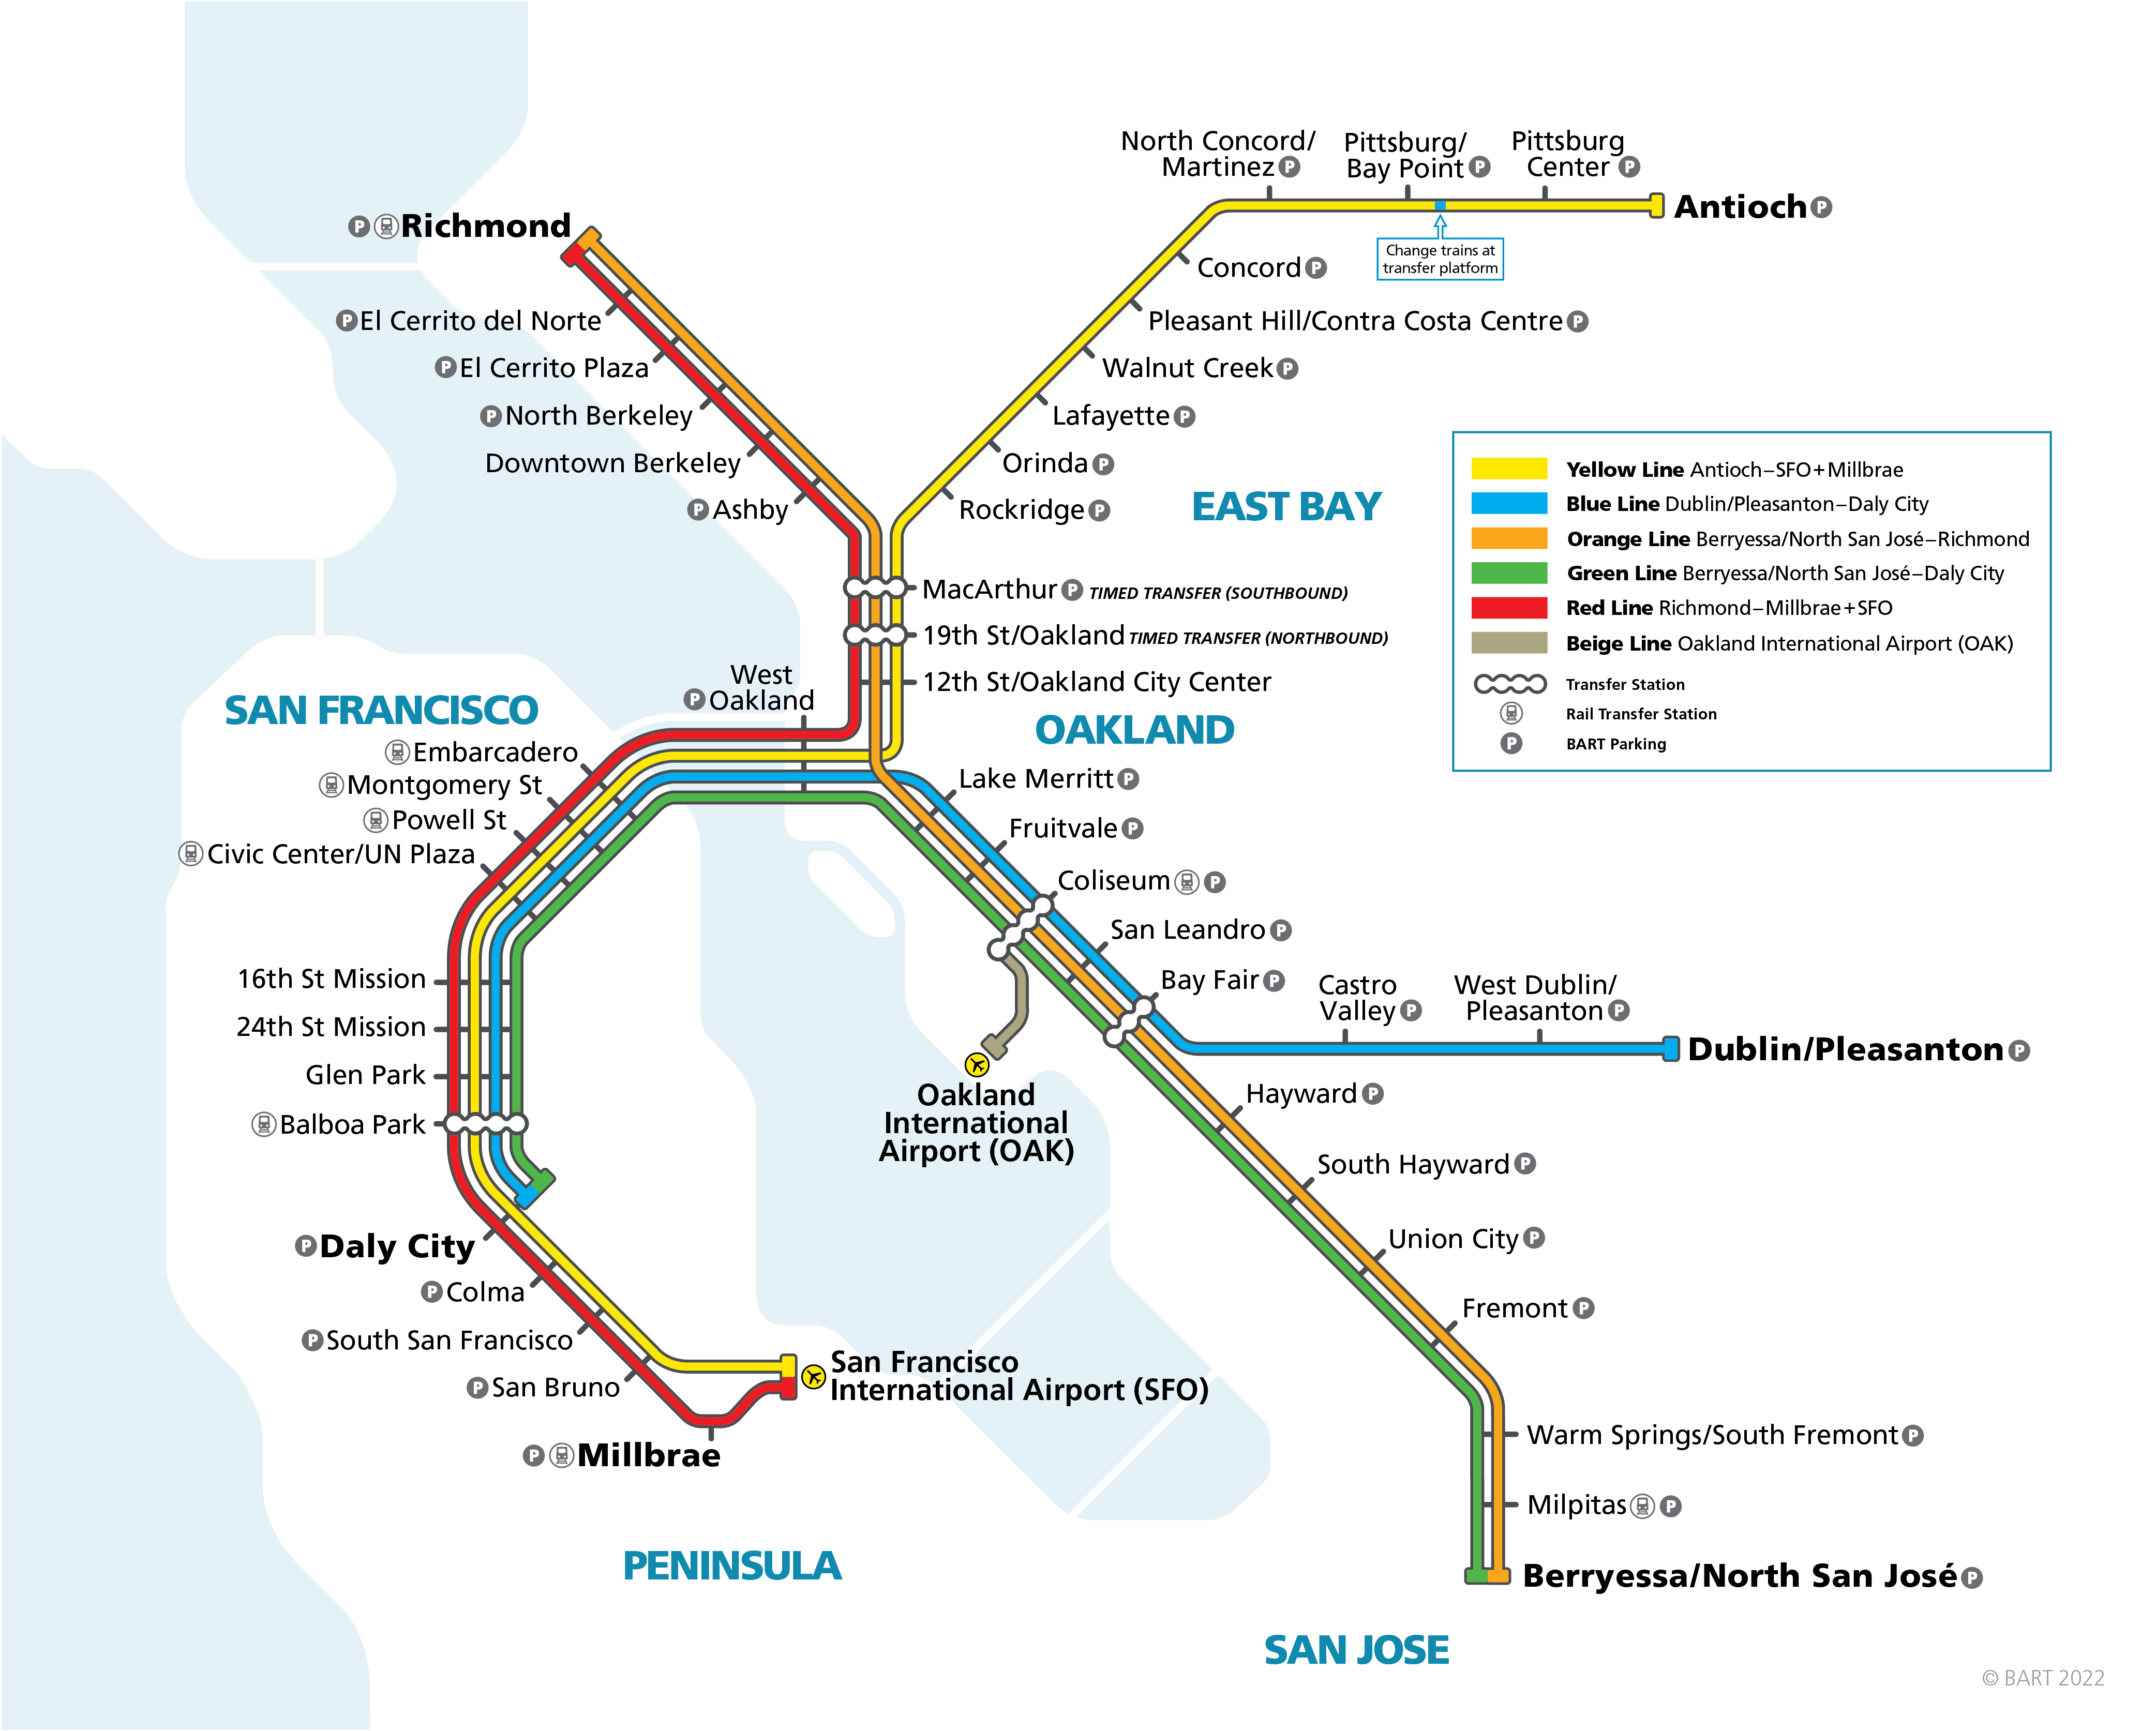

## Connect to Servers

In [1]:
import neo4j

import csv

import math
import numpy as np
import pandas as pd
import pandoc

import psycopg2

from geographiclib.geodesic import Geodesic
from supporting_scripts import utils, calcs

In [2]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

In [3]:
cursor = connection.cursor()

## Create Tables

In [4]:
connection.rollback()

query = """

drop table if exists stations, lines, travel_times

"""

cursor.execute(query)

connection.commit()

In [5]:
connection.rollback()

query = """

create table stations (
    station varchar(32),
    latitude numeric(9,6),
    longitude numeric(9,6),
    transfer_time numeric(3),
    primary key (station)
    );
    
create table lines (
    line varchar(6),
    sequence numeric(2),
    station varchar(32),
    primary key (line, sequence)
    );
    
create table travel_times (
    station_1 varchar(32),
    station_2 varchar(32),
    travel_time numeric(3),
    primary key (station_1, station_2)
    );

"""

cursor.execute(query)

connection.commit()

In [6]:
connection.rollback()

query = """

copy stations
from '/user/projects/project-3-iengelberg/exercise/stations.csv' delimiter ',' NULL '' csv header;

copy lines
from '/user/projects/project-3-iengelberg/exercise/lines.csv' delimiter ',' NULL '' csv header;

copy travel_times
from '/user/projects/project-3-iengelberg/exercise/travel_times.csv' delimiter ',' NULL '' csv header;

"""

cursor.execute(query)

connection.commit()

### Stations Table:

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from stations
order by station

"""

utils.my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,station,latitude,longitude,transfer_time
0,12th Street,37.803608,-122.272006,282
1,16th Street Mission,37.764847,-122.420042,287
2,19th Street,37.807869,-122.268980,67
3,24th Street Mission,37.752000,-122.418700,277
4,Antioch,37.996281,-121.783404,0
5,Ashby,37.853068,-122.269957,299
6,Balboa Park,37.721667,-122.447500,48
7,Bay Fair,37.697000,-122.126500,63
8,Berryessa,37.368361,-121.874655,288
9,Castro Valley,37.690748,-122.075679,0


### Lines Table:

In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from lines
order by lines, sequence

"""

utils.my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,line,sequence,station
0,blue,1,Dublin
1,blue,2,West Dublin
2,blue,3,Castro Valley
3,blue,4,Bay Fair
4,blue,5,San Leandro
...,...,...,...
109,yellow,23,Daly City
110,yellow,24,Colma
111,yellow,25,South San Francisco
112,yellow,26,San Bruno


### Travel_Times Table:

In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from travel_times
order by station_1, station_2

"""

utils.my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,station_1,station_2,travel_time
0,12th Street,19th Street,120
1,12th Street,Lake Merritt,180
2,12th Street,West Oakland,300
3,16th Street Mission,24th Street Mission,120
4,16th Street Mission,Civic Center,180
5,19th Street,MacArthur,180
6,24th Street Mission,Glen Park,180
7,Antioch,Pittsburg Center,420
8,Ashby,Downtown Berkeley,180
9,Ashby,MacArthur,240


## Create Neo4j Graph

In [10]:
utils.my_neo4j_wipe_out_database()
utils.my_neo4j_number_nodes_relationships()

-------------------------
  Nodes: 0
  Relationships: 0
-------------------------


In [11]:
# create depart station and arrive station nodes for each station

connection.rollback()

query = """

select station
from stations
order by station

"""

cursor.execute(query)

connection.rollback()

rows = cursor.fetchall()

for row in rows:
    
    station = row[0]
    
    utils.my_neo4j_create_node('depart ' + station)
    utils.my_neo4j_create_node('arrive ' + station)
    

In [12]:
utils.my_neo4j_number_nodes_relationships()

-------------------------
  Nodes: 100
  Relationships: 0
-------------------------


In [13]:
# create line_station nodes (ex. red line North Berkeley)
# create relationships between each line_station node and the corresponding depart/arrive station nodes

connection.rollback() 

query = """

select station, line
from lines
order by station, line

"""

cursor.execute(query)

connection.rollback()

rows = cursor.fetchall()

for row in rows:
    
    line = row[1]
    station = row[0]
    
    depart = 'depart ' + station
    arrive = 'arrive ' + station
    line_station = line + ' ' + station
    
    utils.my_neo4j_create_node(line_station)
    utils.my_neo4j_create_relationship_one_way(depart, line_station, 0) # weight = 0, no travel time 
    utils.my_neo4j_create_relationship_one_way(line_station, arrive, 0) # weight = 0, no travel time

In [14]:
utils.my_neo4j_number_nodes_relationships()

-------------------------
  Nodes: 214
  Relationships: 228
-------------------------


In [15]:
# create one-way relationship between lines at the same station, weight = transfer time (s)

connection.rollback()

query = """

with t as (select s1.station as station,
       s1.line as from_line,
       s2.line as to_line
from lines as s1
join lines as s2
    on s1.station = s2.station
where s1.line <> s2.line)

select t.station,
       t.from_line,
       t.to_line,
       s.transfer_time
from t
join stations as s
    on t.station = s.station
order by station, from_line, to_line

"""

cursor.execute(query)

connection.rollback()

rows = cursor.fetchall()

for row in rows:
    
    station = row[0]
    from_line = row[1]
    to_line = row[2]
    transfer_time = int(row[3])
    
    from_station = from_line + ' ' + station
    to_station = to_line + ' ' + station
    
    utils.my_neo4j_create_relationship_one_way(from_station, to_station, transfer_time)
    

In [16]:
utils.my_neo4j_number_nodes_relationships()

-------------------------
  Nodes: 214
  Relationships: 436
-------------------------


In [17]:
# create two-way relationship between connecting stations on the same line, weight = travel time (s)

connection.rollback()

query = """

with l as (select s1.line as line,
       s1.station as from_station,
       s2.station as to_station
from lines as s1
join lines as s2
    on s1.line = s2.line
where s2.sequence = s1.sequence + 1)

select l.*,
       tt.travel_time
from l
join travel_times as tt
    on (l.from_station = tt.station_1 and l.to_station = tt.station_2)
    or (l.from_station = tt.station_2 and l.to_station = tt.station_1)
order by line, from_station, to_station

"""

cursor.execute(query)

connection.rollback()

rows = cursor.fetchall()

for row in rows:
    
    line = row[0]
    station1 = row[1]
    station2 = row[2]
    travel_time = int(row[3])
    
    from_station = line + ' ' + station1
    to_station = line + ' ' + station2
    
    utils.my_neo4j_create_relationship_two_way(from_station, to_station, travel_time)
    

In [18]:
utils.my_neo4j_number_nodes_relationships()

-------------------------
  Nodes: 214
  Relationships: 652
-------------------------


### All Stations and Relationships:

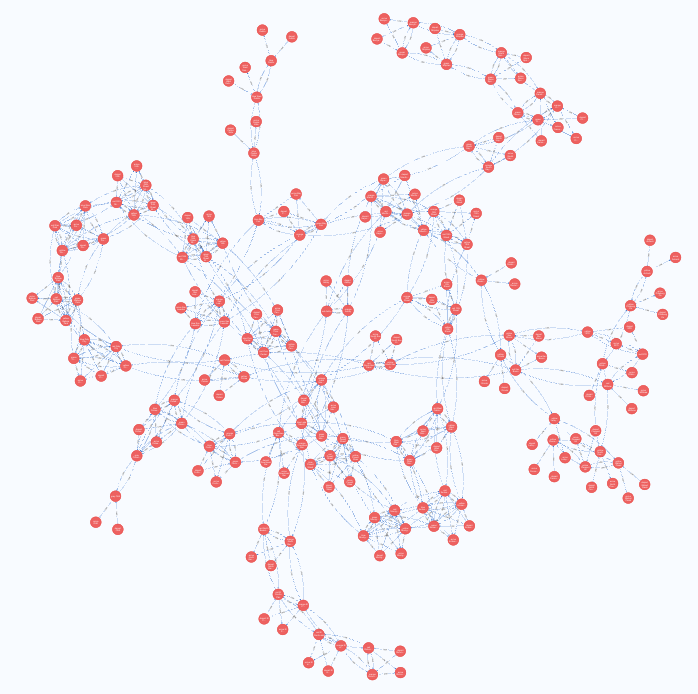

### Berkeley Zoom In:

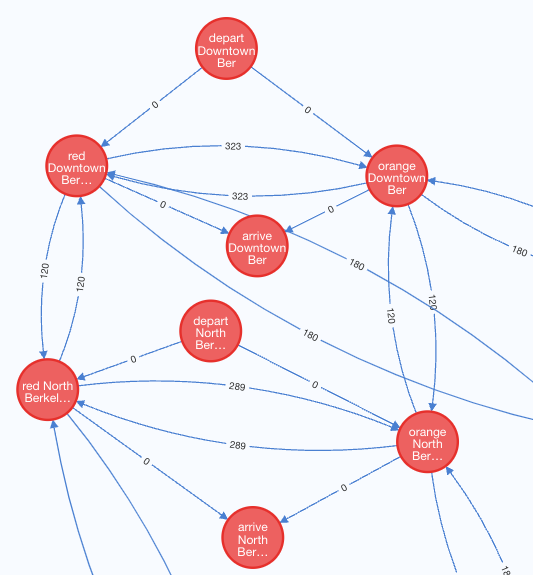

## Calculate Travel Times from Berkeley Store to BART Extremities

In [19]:
calcs.my_neo4j_shortest_path_time("depart Downtown Berkeley", "arrive Richmond")
calcs.my_neo4j_shortest_path_time("depart Downtown Berkeley", "arrive OAK")
calcs.my_neo4j_shortest_path_time("depart Downtown Berkeley", "arrive Dublin")
calcs.my_neo4j_shortest_path_time("depart Downtown Berkeley", "arrive SFO")
calcs.my_neo4j_shortest_path_time("depart Downtown Berkeley", "arrive Antioch")
calcs.my_neo4j_shortest_path_time("depart Downtown Berkeley", "arrive Berryessa")


-------------------------------------------------------
   depart Downtown Berkeley, arrive Richmond:
   Total Travel Time:  13.0  mins
-------------------------------------------------------

-------------------------------------------------------
   depart Downtown Berkeley, arrive OAK:
   Total Travel Time:  32.9  mins
-------------------------------------------------------

-------------------------------------------------------
   depart Downtown Berkeley, arrive Dublin:
   Total Travel Time:  49.9  mins
-------------------------------------------------------

-------------------------------------------------------
   depart Downtown Berkeley, arrive SFO:
   Total Travel Time:  57.8  mins
-------------------------------------------------------

-------------------------------------------------------
   depart Downtown Berkeley, arrive Antioch:
   Total Travel Time:  61.0  mins
-------------------------------------------------------

-----------------------------------------------

Berryessa may be too far for our intended purpose (transporting food), let's check the time for nearby stations:

In [20]:
calcs.my_neo4j_shortest_path_time("depart Downtown Berkeley", "arrive Milpitas")
calcs.my_neo4j_shortest_path_time("depart Downtown Berkeley", "arrive Warm Springs")
calcs.my_neo4j_shortest_path_time("depart Downtown Berkeley", "arrive Fremont")


-------------------------------------------------------
   depart Downtown Berkeley, arrive Milpitas:
   Total Travel Time:  65.0  mins
-------------------------------------------------------

-------------------------------------------------------
   depart Downtown Berkeley, arrive Warm Springs:
   Total Travel Time:  56.0  mins
-------------------------------------------------------

-------------------------------------------------------
   depart Downtown Berkeley, arrive Fremont:
   Total Travel Time:  50.0  mins
-------------------------------------------------------


We are aiming <= 60 mins, so let's choose between Warm Springs and Fremont based on population:

In [21]:
calcs.my_station_get_zips('Warm Springs', 5)
calcs.my_station_get_zips('Fremont', 5)


-------------------------------------------------------------------------------
  Zip Codes within 5 mile(s) of Warm Springs BART Station
-------------------------------------------------------------------------------

     zip: 94536   population:      73,855
     zip: 94538   population:      68,111
     zip: 94539   population:      52,802
     zip: 94560   population:      46,276
     zip: 94586   population:         899
     zip: 95002   population:       2,146
     zip: 95035   population:      77,562

-------------------------------------------------------------------------------
  Total Population:     321,651
-------------------------------------------------------------------------------

-------------------------------------------------------------------------------
  Zip Codes within 5 mile(s) of Fremont BART Station
-------------------------------------------------------------------------------

     zip: 94536   population:      73,855
     zip: 94538   population:      6

Warm Springs has a higher population

### Select Stations based on Connectivity (number relationships)

In [22]:
df = utils.my_neo4j_relationships_df()
rels = df.groupby('node_name_1').size().to_frame().reset_index()
rels = rels.rename(columns={'node_name_1': 'Departing Station', 0: '# Relationships'}).sort_values(
    by='# Relationships', ascending=False)
rels

,Departing Station,# Relationships
49,depart West Oakland,4
14,depart Daly City,4
3,depart 24th Street Mission,4
37,depart Powell Street,4
29,depart Montgomery Street,4
6,depart Balboa Park,4
1,depart 16th Street Mission,4
22,depart Glen Park,4
10,depart Civic Center,4
11,depart Coliseum,4


Let's pick from the stations with the most accessibility (highest # relationships) based on population

In [23]:
populations = {}

for idx, row in rels.iterrows():
    station = row['Departing Station'][7:]
    num_rels = row['# Relationships']
    total_pop = calcs.my_station_zips_count(station, 5)
    populations[station] = [total_pop, num_rels]
    
pd.DataFrame.from_dict(populations, orient='index',  columns=['Total Population within 5 Miles', '# Relationships']).sort_values(
    by=['Total Population within 5 Miles', '# Relationships'], ascending=False)

,Total Population within 5 Miles,# Relationships
24th Street Mission,989138,4
Glen Park,986074,4
Balboa Park,936912,4
Powell Street,870044,4
16th Street Mission,870044,4
Civic Center,870044,4
Montgomery Street,826249,4
Daly City,805122,4
Embarcadero,698612,4
Colma,597747,2
